<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Science in the world<p>
This is a notebook about analysis of World Development Indicators data set features related to science<br>
Dataset was taken <a href=https://www.kaggle.com/worldbank/world-development-indicators>here</a><br>
Here I will explore several questions
* States with best science financing, highest number of articles and researchers per million
* Course of science funding in best scientific states
* Checking whether correlations between science financing, number of researchers per million, number of scientific articles and GDP per capita exist

In [1]:
# Created by me, Alexander Ilin
import pandas as pd
import matplotlib.pyplot as plt
import folium
from IPython.display import HTML
%matplotlib inline

In [2]:
# Load data into the frame
data = pd.read_csv('/home/arleg/PycharmProjects/Courses/Edx/DS/5/WDI/Indicators.csv')

Let\`s make choropleths of science financing, number of articles and researchers per million

In [3]:
# Filtering actual information - 'Research and' will match Research and development expenditure (% of GDP) feature
sci_fi_filter = data['IndicatorName'].str.contains('Research and')
sci_fi = data[sci_fi_filter]

# Group countries and take value associated with last year available for each country
sci_fi_latest = sci_fi[sci_fi['Year'] == sci_fi.groupby(['CountryCode'])['Year'].transform(max)]


In [4]:
# Checking
minimal = sci_fi_latest['Value'].min()
maximal = sci_fi_latest['Value'].max()
print('Worst science financing is {} in {}\nBest science financing is {} in {}'.format(minimal, sci_fi_latest[sci_fi_latest['Value'] == minimal].values[0][0], maximal, sci_fi_latest[sci_fi_latest['Value'] == maximal].values[0][0]))
sci_fi_latest.sort_values('Value').tail()


Worst science financing is 0.012830000000000001 in Lesotho
Best science financing is 4.21329 in Israel


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5515489,Sweden,SWE,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2013,3.30158
5440002,Finland,FIN,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2013,3.30904
5458883,Japan,JPN,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2013,3.47409
5462565,"Korea, Rep.",KOR,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2013,4.14853
5456885,Israel,ISR,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2013,4.21329


In [5]:
# Create map with color varying from yellow to blue as financing of Science go from min to max
graph_fin = folium.Map()
graph_fin.choropleth(geo_path='/home/arleg/PycharmProjects/Courses/Edx/DS/5/world-countries.json',
                data=sci_fi_latest, columns=['CountryCode', 'Value'], key_on='feature.id', 
                 legend_name=sci_fi.iloc[0]['IndicatorName'], fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2)
graph_fin.save('ScienceFinancing_year.html')
HTML('<iframe src=ScienceFinancing_year.html width=700 height=450></iframe>')

In [7]:
# Filtering actual information - 'Researchers' will match Researchers in R&D (per million people) feature
sci_res_filter = data['IndicatorName'].str.contains('Researchers')
sci_res = data[sci_res_filter]

# Group countries and take value associated with the latest year for each country
sci_res_latest = sci_res[sci_res['Year'] == sci_res.groupby(['CountryCode'])['Year'].transform(max)]


In [8]:
# Checking
minimal = sci_res_latest['Value'].min()
maximal = sci_res_latest['Value'].max()
print('Least number of researchers per million is {} in {}\nThe largest number of researchers per million is {} in {}'.format(minimal, sci_res_latest[sci_res_latest['Value'] == minimal].values[0][0], maximal, sci_res_latest[sci_res_latest['Value'] == maximal].values[0][0]))
sci_res_latest.sort_values(by='Value')

Least number of researchers per million is 5.85356 in Lesotho
The largest number of researchers per million is 8282.30672 in Israel


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5127739,Lesotho,LSO,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2011,5.853560
4070541,Niger,NER,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2005,7.489560
4800760,Rwanda,RWA,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2009,12.289770
3563033,Lao PDR,LAO,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2002,15.811450
3581243,Myanmar,MMR,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2002,17.190410
3516153,Cambodia,KHM,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2002,17.580060
5279991,Guatemala,GTM,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2012,26.742560
4956391,Mali,MLI,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2010,29.174630
3218891,"Congo, Rep.",COG,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2000,32.724730
5099164,"Gambia, The",GMB,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2011,33.502960


In [9]:
# Create map with color varying from yellow to blue as number of researchers per million go from min to max
graph_nos = folium.Map()
graph_nos.choropleth(geo_path='/home/arleg/PycharmProjects/Courses/Edx/DS/5/world-countries.json',
                data=sci_res_latest, columns=['CountryCode', 'Value'], key_on='feature.id', 
                 legend_name=sci_res.iloc[0]['IndicatorName'], fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2)
graph_nos.save('NumberOfScientists_year.html')
HTML('<iframe src=NumberOfScientists_year.html width=700 height=450></iframe>')

In [10]:
# Filtering actual information - 'Scientific' will match Scientific and technical journal articles feature
sci_art_filter = data['IndicatorName'].str.contains('Scientific')
sci_art = data[sci_art_filter]

# Group countries and take latest results for every country
sci_art_latest = sci_art[sci_art['Year'] == sci_art.groupby(['CountryCode'])['Year'].transform(max)]

In [11]:
# Checking
minimal = sci_art_latest['Value'].min()
maximal = sci_art_latest['Value'].max()
print('The smallest number of scientific articles is {} in {}\nThe largest number of scientific articles is {} in {}'.format(minimal, sci_art_latest[sci_art_latest['Value'] == minimal].values[0][0], maximal, sci_art_latest[sci_art_latest['Value'] == maximal].values[0][0]))
# sci_art_latest.head()
sci_art_latest.sort_values(by='Value')

The smallest number of scientific articles is 0.0 in Kiribati
The largest number of scientific articles is 842756.49702107 in World


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5165353,Samoa,WSM,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.000000
5122762,Kosovo,KSV,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.000000
5121250,Kiribati,KIR,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.000000
5191352,Tuvalu,TUV,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.000000
5178633,St. Vincent and the Grenadines,VCT,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.000000
5051705,Antigua and Barbuda,ATG,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.200000
5166261,Sao Tome and Principe,STP,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.300000
5137563,Marshall Islands,MHL,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.300000
5079459,Comoros,COM,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.300000
5135643,Maldives,MDV,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,0.300000


In [195]:
# To keep map informative I cut row with data about big unions of countries (e.g. World, High income)
non_vis_on_map = sci_art_latest['Value'] < 250000
sci_art_latest = sci_art_latest[non_vis_on_map]
print('The smallest number of scientific articles is {} in {}\nThe largest number of scientific articles is {} in {}'.format(minimal, sci_art_latest[sci_art_latest['Value'] == minimal].values[0][0], sci_art_latest['Value'].max(), sci_art_latest[sci_art_latest['Value'] == sci_art_latest['Value'].max()].values[0][0]))


The smallest number of scientific articles is 0.0 in Kiribati
The largest number of scientific articles is 237663.798741129 in North America


In [12]:
# Create map with color varying from yellow to blue as number of articles go from min to max
graph_art = folium.Map()
graph_art.choropleth(geo_path='/home/arleg/PycharmProjects/Courses/Edx/DS/5/world-countries.json',
                data=sci_art_latest, columns=['CountryCode', 'Value'], key_on='feature.id', 
                 legend_name=sci_art.iloc[0]['IndicatorName'], fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2)
graph_art.save('NumberOfArticles_year.html')
HTML('<iframe src=NumberOfArticles_year.html width=700 height=450></iframe>')

In [ ]:
# To make screenshots from html choropleths
import time
from selenium import webdriver


files = ['ScienceFinancing_year.html', 'NumberOfScientists_year.html', 'NumberOfArticles_year.html']
link = 'file:///home/arleg/PycharmProjects/Courses/Edx/DS/6MidProject/'

# Open a browser
browser = webdriver.Firefox()
# Open each map and save it after loading
for i, file in enumerate(files):
    browser.get('{}{}'.format(link, file))
    time.sleep(5)
    browser.save_screenshot('{}.png'.format(file[:-5]))

# Close browser
browser.quit()


Now let\`s see how funding has changed in top Scientific States - Israel, Republic of Korea, Japan, Finland and Sweden

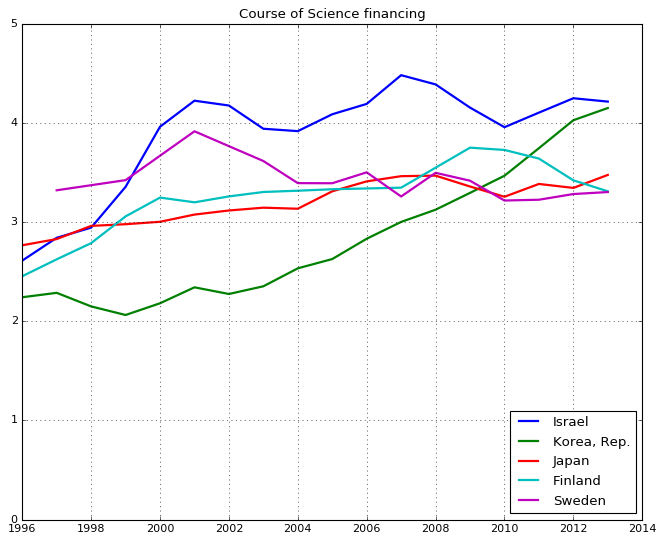

In [13]:
countries = ['Israel', 'Korea, Rep.', 'Japan', 'Finland', 'Sweden']
plt.figure(figsize=(10, 8))
for country in countries:
    time = sci_fi[sci_fi['CountryName'] == country].sort_values('Year')['Year']
    funding = sci_fi[sci_fi['CountryName'] == country].sort_values('Year')['Value']
    country_label = country
    plt.plot(time, funding, label=country_label, linewidth=2)
plt.gca().set_ylim([0, 5])
plt.grid(True)
plt.title('Course of Science financing')
plt.legend(loc='lower right')
plt.savefig('CourseOfScienceFin.png', bbox_inches='tight')
plt.show()


In [14]:
# Taking mean through years for science financing, ratio of researchers and number of articles for each country
sci_fi_avg = sci_fi[['CountryName', 'CountryCode', 'Value']].groupby(['CountryCode', 'CountryName']).mean()
sci_res_avg = sci_res[['CountryName', 'CountryCode', 'Value']].groupby(['CountryCode', 'CountryName']).mean()
sci_art_avg = sci_art[['CountryName', 'CountryCode', 'Value']].groupby(['CountryCode', 'CountryName']).mean()


In [15]:
# Renaming columns
sci_fi_avg.columns = ['Financing' if x == 'Value' else x for x in sci_fi_avg.columns]
sci_res_avg.columns = ['ResearchersNumber' if x == 'Value' else x for x in sci_res_avg.columns]
sci_art_avg.columns = ['ArticlesNumber' if x == 'Value' else x for x in sci_art_avg.columns]

# Merging into one frame
sci_avg = pd.concat([sci_fi_avg, sci_res_avg, sci_art_avg], axis=1)
# Exclude countries with partial information
sci_avg = sci_avg.dropna()


In [17]:
# Let`s look at some statistics of our set
sci_avg.describe()

,Financing,ResearchersNumber,ArticlesNumber
count,129.000000,129.000000,129.000000
mean,0.902956,1453.254924,30142.724325
std,0.874215,1702.146073,98111.408990
min,0.023783,10.717620,0.523077
25%,0.266439,143.625595,73.384615
50%,0.583075,657.561260,687.512500
75%,1.249219,2531.406921,8964.478571
max,3.876153,7789.279965,596936.369274


In [18]:
# Correlations of mean through years financing, number of researchers and number of articles from 129 countries
sci_avg.corr()

,Financing,ResearchersNumber,ArticlesNumber
Financing,1.000000,0.894809,0.411909
ResearchersNumber,0.894809,1.000000,0.215961
ArticlesNumber,0.411909,0.215961,1.000000


Correlation for Science Financing and Researchers Number is quite high, which could be explained with hypotheses like the more state finance science, the more scientists come there, or the more likely that humans decide to become scientists. But as everybody knows correlation doesn\`t mean causations.<br>
The correlation between Researchers Number and Articles Number is low probably because of absence of influence of country population on Researchers Number (cause it is essentialy a ratio). So country with lower Researchers Number but bigger population can have more scientist than other country with higher Researchers Number and lower population size

In [19]:
# Just for interest let`s look at world latest indicators
world_filter = data['CountryName'] == 'World'
feature_filter = data['IndicatorName'].str.contains('Research and') | data['IndicatorName'].str.contains('Researchers') |  data['IndicatorName'].str.contains('Scientific')
world = data[world_filter & feature_filter]

In [20]:
world = world[world['Year'] == world.groupby('IndicatorName')['Year'].transform(max)]
world

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4862019,World,WLD,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2010,1268.318856
5047384,World,WLD,Scientific and technical journal articles,IP.JRN.ARTC.SC,2011,842756.497021
5223621,World,WLD,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2012,2.177305
